# Business understanding
Goal is to segment customers based on their income and spending habits. This will help the marketing team target the right customers with the right products.

## Ehdotuksia:

**Jos löytyy energiaa osallistua, niin tota tehtävänannon kysymyksen asettelua vois vielä pohtia lisää, eli yritetään keksiä mitä kaikkea tosta saa kaivettua esiin..**

- Jos ymmärsin datan oikein toi amoutspent on vaa rahan määrä. Olisko kiinnostavaa tutkia kuinka suuren osan tuloista käyttää eri tuoteryhmiin?
- Erilaisia suhteita muuttujien välillä assosiaation avulla esim. liittyykö lapsien määrä karkin oston määrään, minkä ikäset ostaa eniten viiniä jne
- Vaikuttaako tulojen määrä promootioihin osallistumiseen?
- Minkälaista porukkaa käyttää nettikauppaa vs katalogia vs kauppaa?

## Data Understanding


### People
**Basic information about the customer.**
- Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


### Products
**Information about the amount spent on product groups by a customer.**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


### Promotion
**Information about the customer's promotion participation.**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


### Place
**Information about the location of the customer's activity.**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


## Data Preparation

In [702]:
import pandas  as pd

df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


New columns created:
- TotalSpent: Sum of all money spent on products
- Age: Age of the customer
- Has_Partner: 1 if the customer is married or living together, 0 otherwise
Columns removed : ID, Z_CostContact, Z_Revenue,Response,  also removed accepted campaign columns and created new column "AcceptedCmpAny" which is 1 if customer accepted any campaign, 0 otherwise.
Removed also unnecessary rows that had "meme" values in them eg. "Absurd", "YOLO".

In [703]:
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df["Age"] = 2015 - df["Year_Birth"]
df.drop(columns = ['ID',"Z_CostContact","Z_Revenue","Response"] , axis=1, inplace=True)
df = df.dropna()

df = df[~df["Marital_Status"].isin(["Absurd", "YOLO"])]
df["Has_Partner"] = df["Marital_Status"].apply(lambda x: 1 if x in ["Together", "Married"] else 0)
df["AcceptedCmpAny"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]
df["AcceptedCmpAny"] = df["AcceptedCmpAny"].apply(lambda x: 1 if x > 0 else 0)
df["IsAlone"] = df["Kidhome"] + df["Teenhome"] + df["Has_Partner"]
df["IsAlone"] = df["IsAlone"].apply(lambda x: 1 if x == 0 else 0)
df["SingleParent"] = ((df["Has_Partner"] == 0) & ((df["Kidhome"] > 0) | (df["Teenhome"] > 0))).astype(int)
df = df.drop(columns=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"], axis=1)

df["SingleParent"] = ((df["Has_Partner"] == 0) & ((df["Kidhome"] > 0) | (df["Teenhome"] > 0))).astype(int)

removed outliers from income and age by using IQR method
11 rows were removed from the dataset

In [704]:
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
IQR = Q3 - Q1

Income_outliers = df[df.Income > Q3 + 1.5*IQR]
df = df[df.Income < Q3 + 1.5*IQR]
Income_outliers.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpent,Age,Has_Partner,AcceptedCmpAny,IsAlone,SingleParent
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,22,0,0,0,1608,42,1,0,0,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,...,0,1,1,0,107,39,1,0,0,0
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,6,40,0,0,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,28,1,0,0,1717,33,1,0,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,...,0,1,1,0,59,44,1,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,...,28,0,1,0,1730,38,1,0,0,0
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,8,66,1,0,0,0
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,1,3,6,0,62,38,1,0,0,0


In [705]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1

Age_outliers = df[df.Age > Q3 + 1.5*IQR]
df = df[df.Age < Q3 + 1.5*IQR]
Age_outliers.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalSpent,Age,Has_Partner,AcceptedCmpAny,IsAlone,SingleParent
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,1,2,5,1,65,115,0,0,0,1
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,0,2,4,0,22,122,0,0,0,1
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,6,4,1,0,1853,116,1,1,0,0


created new columns for income and spending habits based on quantiles

In [706]:
num_groups = 3

df["IncomeCategory"] = pd.qcut(df["Income"], q=num_groups, labels=["Low Income", "Medium Income", "High Income"])
df["SpendingHabits"] = pd.qcut(df["TotalSpent"], q=num_groups, labels=["Low Spender", "Medium Spender", "High Spender"])

In [707]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,Complain,TotalSpent,Age,Has_Partner,AcceptedCmpAny,IsAlone,SingleParent,IncomeCategory,SpendingHabits
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,1617,58,0,0,1,0,Medium Income,High Spender
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,27,61,0,0,0,1,Medium Income,Low Spender
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,776,50,1,0,0,0,High Income,Medium Spender
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,53,31,1,0,0,0,Low Income,Low Spender
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,422,34,1,0,0,0,Medium Income,Medium Spender


plotting the data so we can see what kind of customers we have, and that the data is distributed normally

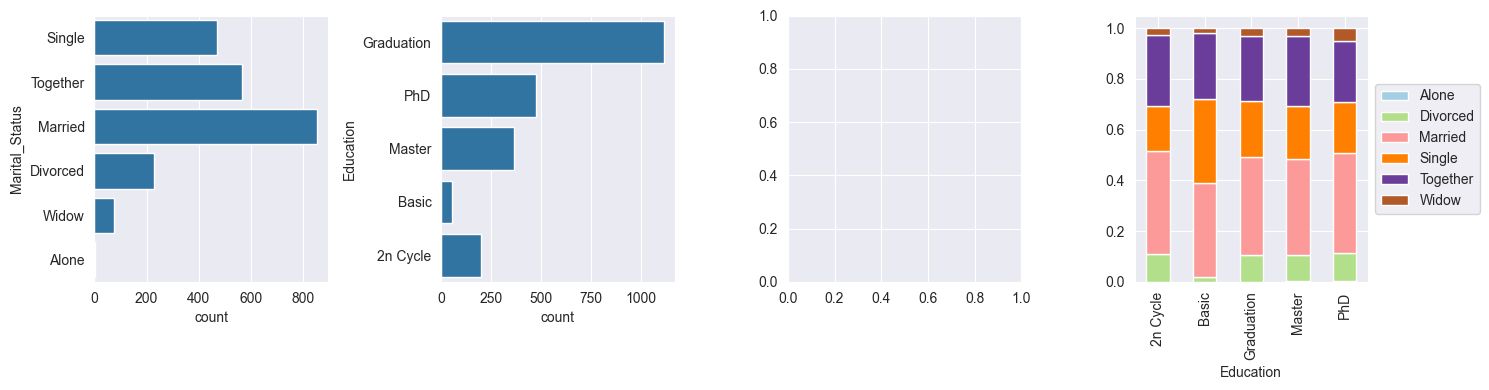

In [708]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,4, figsize=(15,4))

sns.countplot(df['Marital_Status'], ax=ax[0])

sns.countplot(df['Education'], ax=ax[1])

df_plot = df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0,)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[3],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

#fig.show()

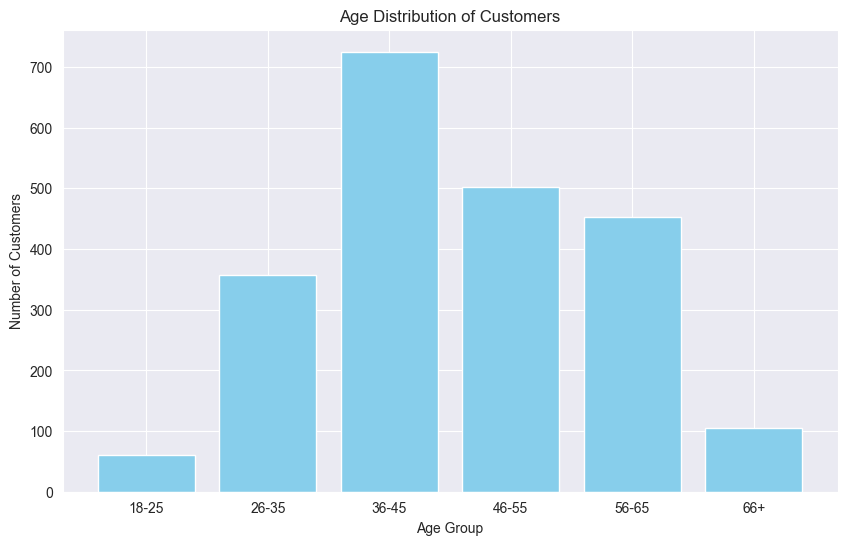

In [709]:

bins = [17, 25, 35, 45, 55, 65, 100]  # 17 ensures ages 18 and up are included
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]


df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)


age_counts = df["AgeGroup"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index.astype(str), age_counts.values, color="skyblue")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")
plt.xticks(rotation=0)
plt.show()

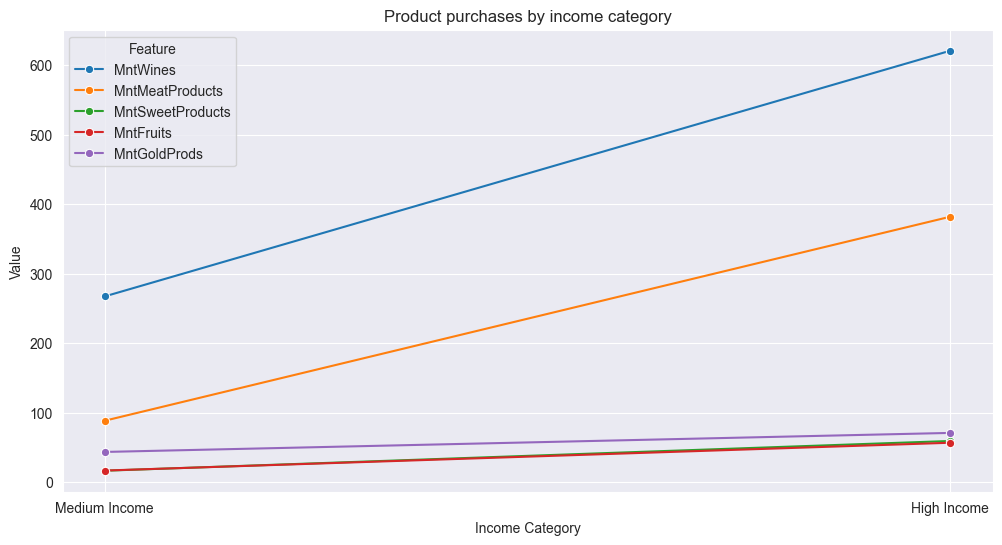

In [710]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
features_to_plot = ["MntWines","MntMeatProducts" ,"MntSweetProducts", "MntFruits", "MntGoldProds"]

df_melted = df.melt(id_vars=["IncomeCategory"], value_vars=features_to_plot, var_name="Feature", value_name="Value")
category_order = ["Poor","Medium Income","High Income" ,"Rich" ]
df_melted["IncomeCategory"] = pd.Categorical(df_melted["IncomeCategory"], categories=category_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x="IncomeCategory", y="Value", hue="Feature", data=df_melted, marker="o",errorbar=None)

plt.title("Product purchases by income category")
plt.xlabel("Income Category")
plt.ylabel("Value")
plt.grid(True)

plt.show()


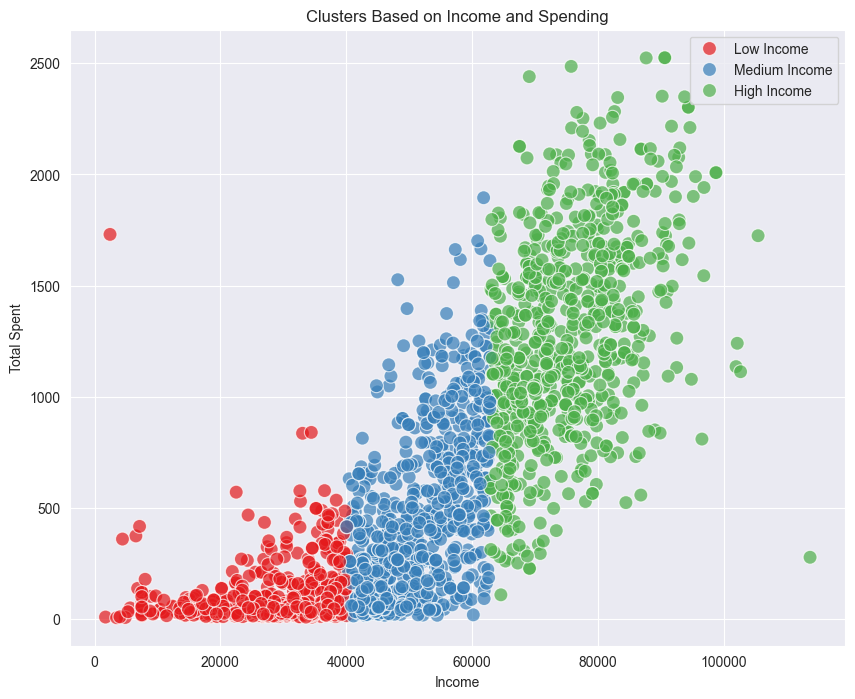

In [711]:

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df["Income"], y=df["TotalSpent"], hue=df["IncomeCategory"],palette="Set1", s=100, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.title("Clusters Based on Income and Spending")
plt.legend()
plt.show()


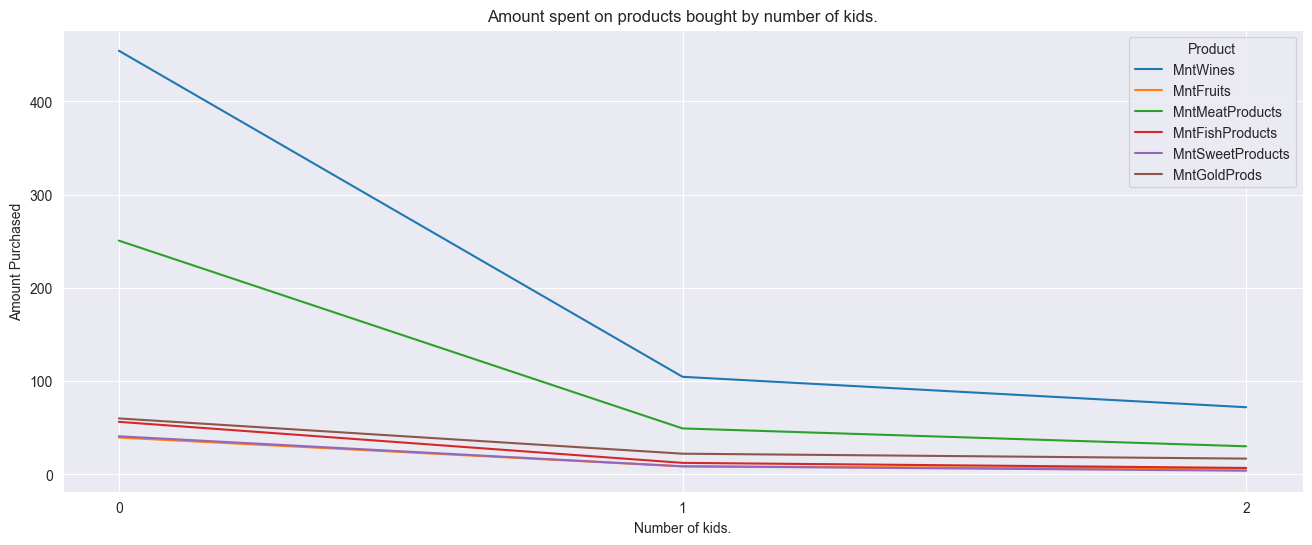

In [712]:
products_long = pd.melt(mutable_df, id_vars=['Kidhome'],
                       value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                       var_name='Product', value_name='Amount')
plt.figure(figsize=(16, 6))

sns.lineplot(data=products_long, x='Kidhome', y='Amount', hue='Product', errorbar=None)

plt.title('Amount spent on products bought by number of kids.')
plt.xlabel('Number of kids.')
plt.ylabel('Amount Purchased')
plt.xticks(list(range(products_long['Kidhome'].min(), products_long['Kidhome'].max() + 1)))

plt.legend(title='Product')
plt.show()

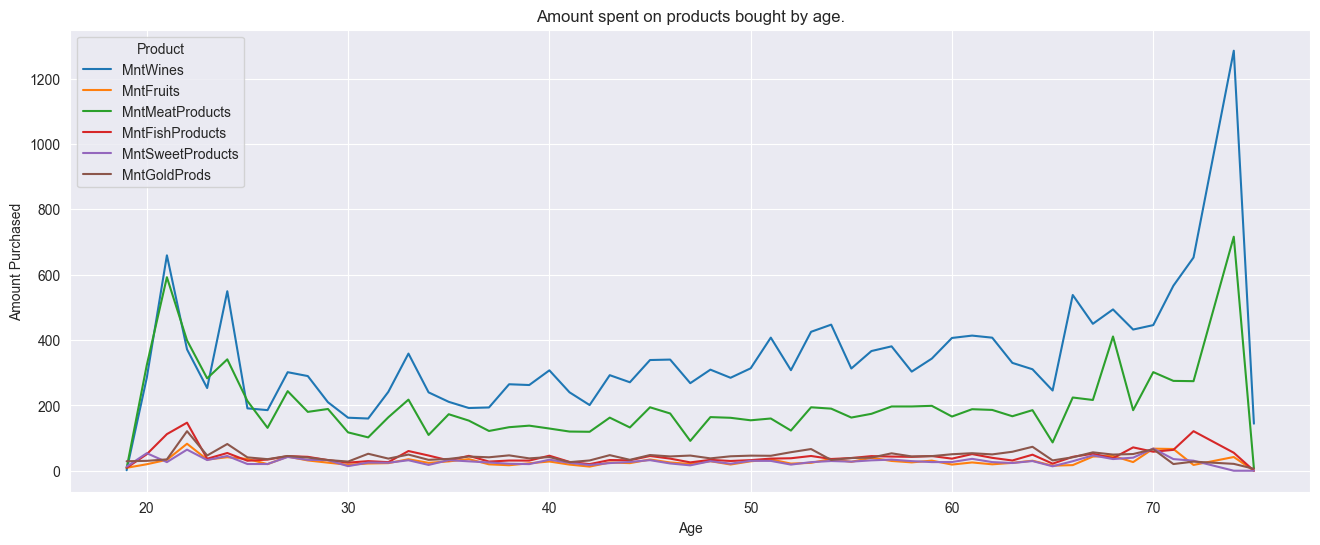

In [713]:
# Hahmottaa tuotteiden ostoa iän suhteen
mutable_df['Age'] = 2015 - mutable_df['Year_Birth']
products_long = pd.melt(mutable_df, id_vars=['Age'], 
                       value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                       var_name='Product', value_name='Amount')
plt.figure(figsize=(16, 6))

sns.lineplot(data=products_long, x='Age', y='Amount', hue='Product', errorbar=None)

plt.title('Amount spent on products bought by age.')
plt.xlabel('Age')
plt.ylabel('Amount Purchased')

plt.legend(title='Product')
plt.show()

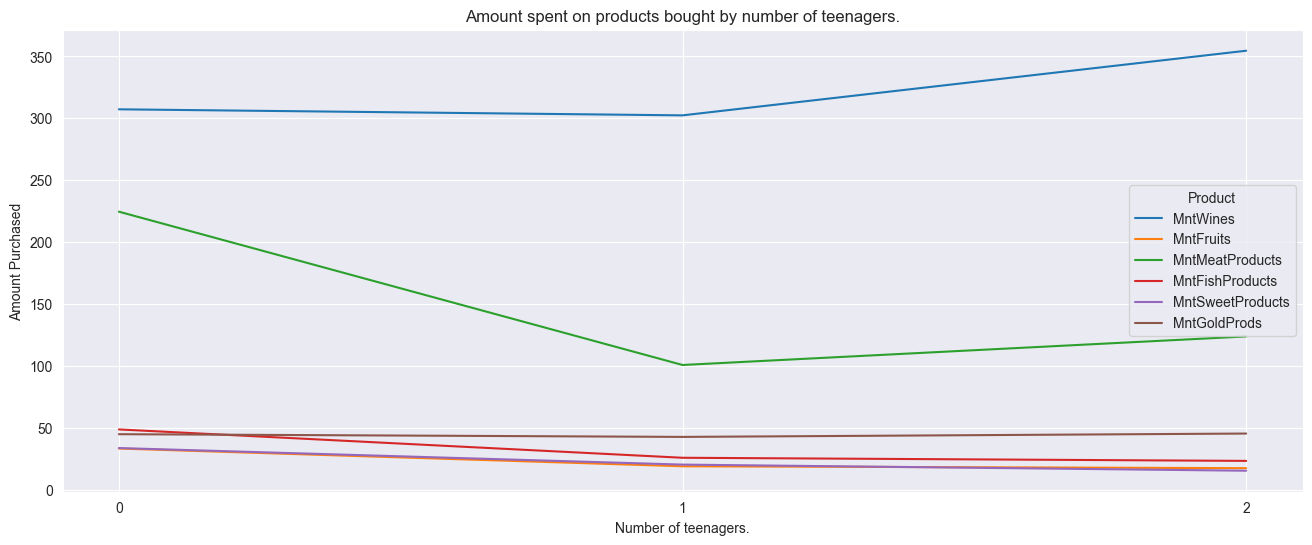

In [714]:
products_long = pd.melt(mutable_df, id_vars=['Teenhome'],
                       value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                       var_name='Product', value_name='Amount')
plt.figure(figsize=(16, 6))

sns.lineplot(data=products_long, x='Teenhome', y='Amount', hue='Product', errorbar=None)

plt.title('Amount spent on products bought by number of teenagers.')
plt.xlabel('Number of teenagers.')
plt.ylabel('Amount Purchased')
plt.xticks(list(range(products_long['Teenhome'].min(), products_long['Teenhome'].max() + 1)))

plt.legend(title='Product')
plt.show()

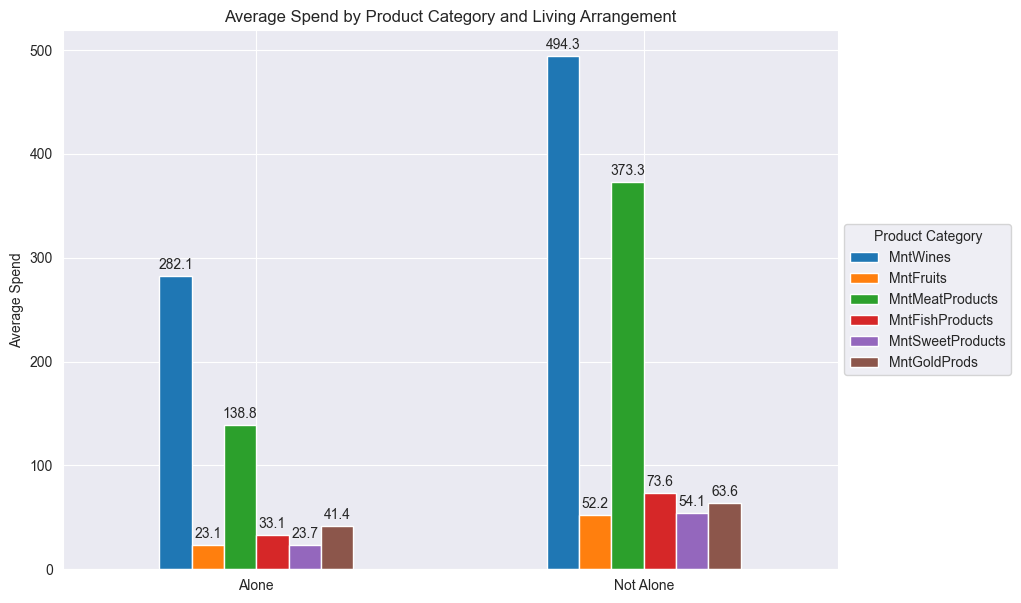

In [715]:
purchase_cols = ["MntWines", "MntFruits", "MntMeatProducts",
                 "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

avg_category = df.groupby("IsAlone")[purchase_cols].mean()

ax = avg_category.plot(kind='bar', figsize=(10, 7))
plt.ylabel("Average Spend")
plt.title("Average Spend by Product Category and Living Arrangement")
plt.xticks(ticks=[0,1], labels=['Alone', 'Not Alone'], rotation=0)
plt.legend(title='Product Category', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

plt.show()

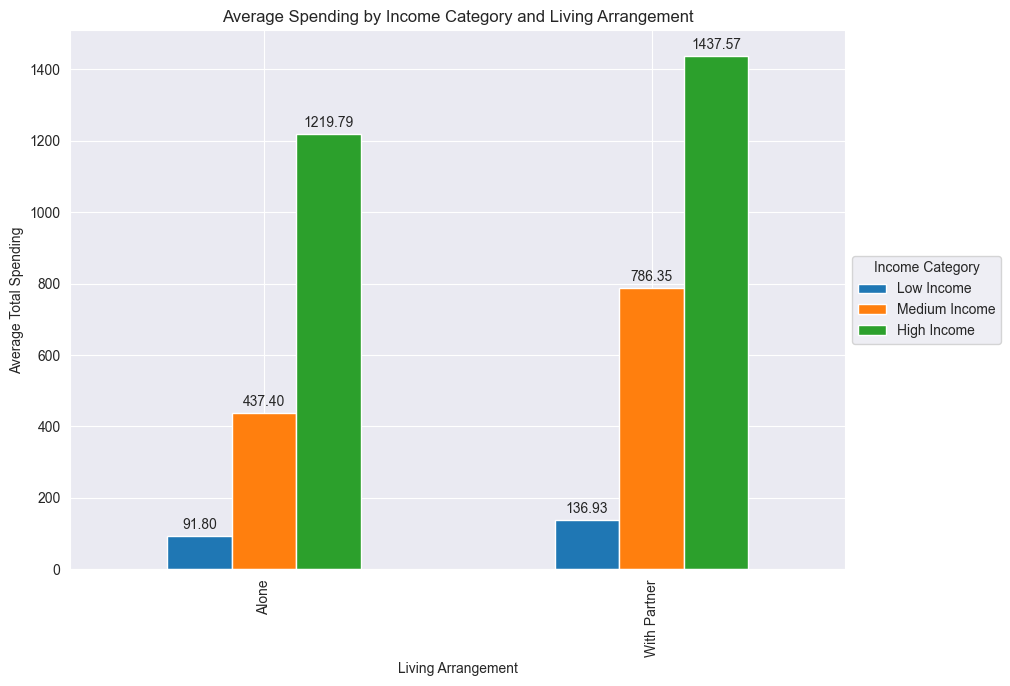

In [716]:
df_poor = df[df["IncomeCategory"] == "Low Income"]
df_high_income = df[df["IncomeCategory"] == "High Income"]
df_medium_income = df[df["IncomeCategory"] == "Medium Income"]

avg_spend_high_income = df_high_income.groupby("IsAlone")["TotalSpent"].mean()
avg_spend_med_income = df_medium_income.groupby("IsAlone")["TotalSpent"].mean()
avg_spend_poor = df_poor.groupby("IsAlone")["TotalSpent"].mean()

df_spend = pd.DataFrame({
    "Low Income": avg_spend_poor,
    "Medium Income": avg_spend_med_income,
    "High Income": avg_spend_high_income,
})


df_spend.index = df_spend.index.map({0: "Alone", 1: "With Partner"})


ax = df_spend.plot(kind="bar", figsize=(10, 7))
plt.xlabel("Living Arrangement")
plt.ylabel("Average Total Spending")
plt.title("Average Spending by Income Category and Living Arrangement")
plt.legend(title="Income Category", loc="center left", bbox_to_anchor=(1, 0.5))


for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.show()


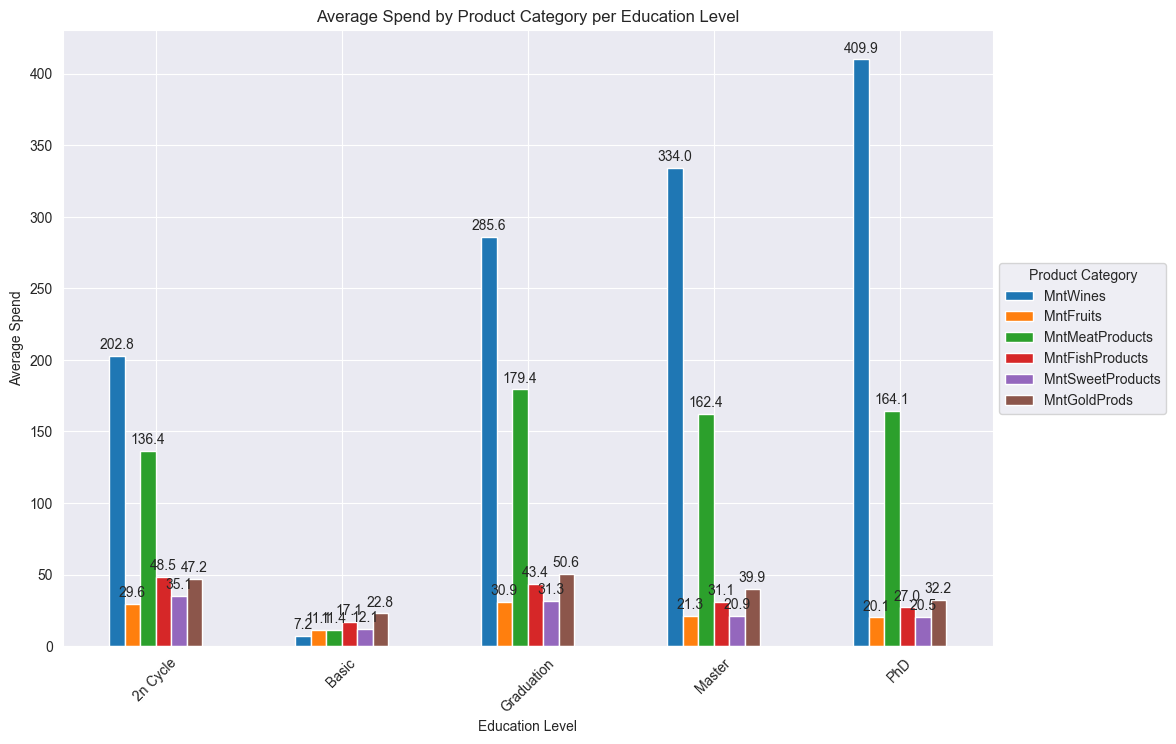

In [717]:
education_avg = df.groupby("Education")[purchase_cols].mean()


ax = education_avg.plot(kind='bar', figsize=(12,8))
plt.xlabel("Education Level")
plt.ylabel("Average Spend")
plt.title("Average Spend by Product Category per Education Level")
plt.xticks(rotation=45)
plt.legend(title="Product Category", loc="center left", bbox_to_anchor=(1, 0.5))


for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

plt.show()

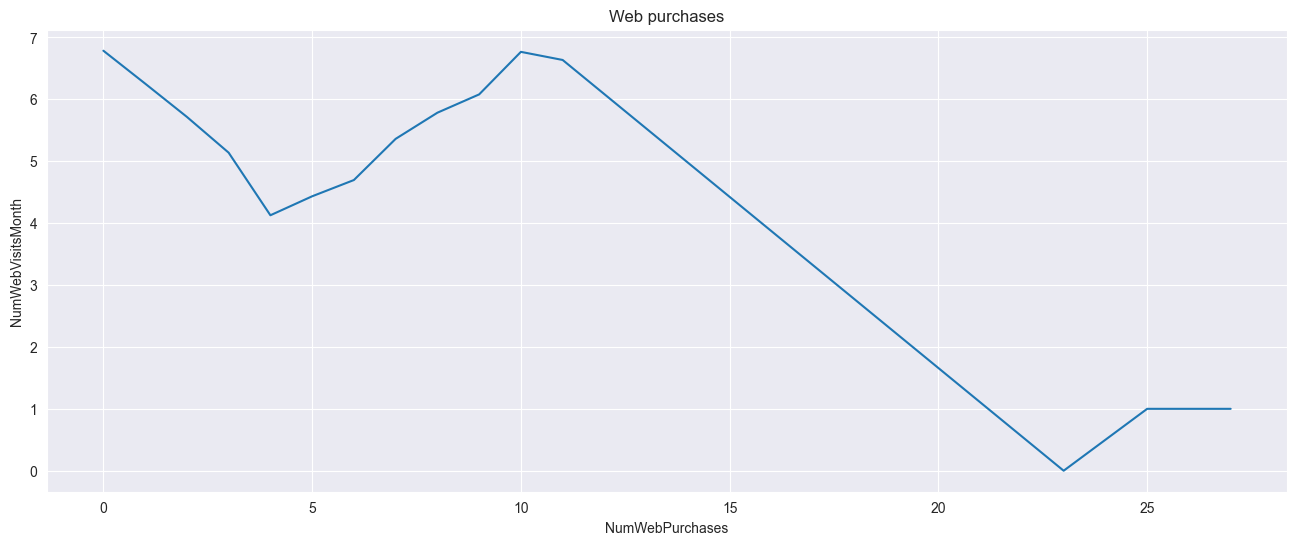

In [718]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='NumWebPurchases', y='NumWebVisitsMonth', errorbar=None)
plt.title('Web purchases')
plt.show()

# Modeling

In [734]:
# Apriorissa ongelma että pitää olla binary arvot 
# Vaan 186 alle 40v pitäs varmaan muuttaa
# Voi olla että ihan turha tehä tämmöstä
# Pitäs keksiä enemmän binääriarvoja
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

mutable_df = df.copy()
mutable_df['above_average_wine'] = df['MntWines'].mean() < df['MntWines']
mutable_df['over_40'] = 2015 - df['Year_Birth'] > 40
mutable_df['under_average_wine'] = df['MntWines'].mean() > df['MntWines']
mutable_df['under_40'] = 2015 - df['Year_Birth'] < 40
mutable_df.head(10)
new = mutable_df.filter(['above_average_wine', 'over_40', 'under_average_wine', 'under_40'], axis = 1)
freq = apriori(new, min_support=0.01, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0)
rules.sort_values(by='support', ascending=False)
desired_cons3 = ["under_average_wine","above_average_wine"]
filtered_rules = rules[rules["consequents"].apply(lambda x: any(item in x for item in desired_cons3))]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(over_40),(above_average_wine),0.651976,0.386642,0.279873,0.429268,1.110246,1.0,0.027791,1.074686,0.285322,0.368862,0.069496,0.576561
2,(under_40),(above_average_wine),0.310768,0.386642,0.093594,0.301170,0.778936,1.0,-0.026562,0.877692,-0.291668,0.155004,-0.139352,0.271619
4,(over_40),(under_average_wine),0.651976,0.613358,0.372104,0.570732,0.930504,1.0,-0.027791,0.900701,-0.176685,0.416582,-0.110246,0.588699
7,(under_40),(under_average_wine),0.310768,0.613358,0.217174,0.698830,1.139352,1.0,0.026562,1.283803,0.177456,0.307198,0.221064,0.526452


In [720]:
# Päätelmiä:
# 57% yli 40v ostaa alle keskimäärän viiniä
# 30% alle 40v ostaa yli keskimäärän viiniä
# etc

In [721]:

mutable_df['above_average_web'] = mutable_df['NumWebPurchases'].mean() < mutable_df['NumWebPurchases']
mutable_df['above_average_cat'] = mutable_df['NumCatalogPurchases'].mean() < mutable_df['NumCatalogPurchases']
mutable_df['above_average_store'] = mutable_df['NumStorePurchases'].mean() < mutable_df['NumStorePurchases']
mutable_df['under_average_web'] = mutable_df['NumWebPurchases'].mean() > mutable_df['NumWebPurchases']
mutable_df['under_average_cat'] = mutable_df['NumCatalogPurchases'].mean() > mutable_df['NumCatalogPurchases']
mutable_df['under_average_store'] = mutable_df['NumStorePurchases'].mean() > mutable_df['NumStorePurchases']
new = mutable_df.filter(['above_average_web', 'over_40', 'above_average_cat', 'under_40', 'above_average_store',
                        'under_average_web', 'under_average_cat', 'under_average_store'], axis = 1)
freq = apriori(new, min_support=0.4, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0.5)
rules.sort_values(by='support', ascending=False)
# 54% yli 40v ostaa alle keskiarvon kaikista paikoista

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(under_average_cat),(over_40),0.605634,0.900954,0.543844,0.897974,0.996693,1.0,-0.001805,0.970795,-0.008344,0.564889,-0.030083,0.750803
3,(over_40),(under_average_cat),0.900954,0.605634,0.543844,0.603631,0.996693,1.0,-0.001805,0.994947,-0.032415,0.564889,-0.005079,0.750803
0,(over_40),(under_average_web),0.900954,0.618810,0.541572,0.601109,0.971396,1.0,-0.015947,0.955626,-0.229166,0.553646,-0.046434,0.738146
1,(under_average_web),(over_40),0.618810,0.900954,0.541572,0.875184,0.971396,1.0,-0.015947,0.793532,-0.071708,0.553646,-0.260188,0.738146
4,(over_40),(under_average_store),0.900954,0.564743,0.503862,0.559254,0.990279,1.0,-0.004946,0.987545,-0.090169,0.523855,-0.012612,0.725725
5,(under_average_store),(over_40),0.564743,0.900954,0.503862,0.892196,0.990279,1.0,-0.004946,0.918761,-0.022055,0.523855,-0.088422,0.725725
10,(under_average_cat),(under_average_store),0.605634,0.564743,0.477510,0.788447,1.396116,1.0,0.135483,2.057437,0.719451,0.689180,0.513958,0.816991
11,(under_average_store),(under_average_cat),0.564743,0.605634,0.477510,0.845535,1.396116,1.0,0.135483,2.553110,0.651862,0.689180,0.608321,0.816991
6,(under_average_cat),(under_average_web),0.605634,0.618810,0.472967,0.780945,1.262012,1.0,0.098195,1.740160,0.526451,0.629383,0.425340,0.772631
7,(under_average_web),(under_average_cat),0.618810,0.605634,0.472967,0.764317,1.262012,1.0,0.098195,1.673292,0.544648,0.629383,0.402376,0.772631


In [722]:
df[(df["Has_Partner"] == 1) & (df["Kidhome"] > 0)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,TotalSpent,Age,Has_Partner,AcceptedCmpAny,IsAlone,SingleParent,IncomeCategory,SpendingHabits,AgeGroup
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,53,31,1,0,0,0,Low Income,Low Spender,26-35
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,422,34,1,0,0,0,Medium Income,Medium Spender,26-35
7,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,0,169,30,1,0,0,0,Low Income,Medium Spender,26-35
8,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,0,46,41,1,0,0,0,Low Income,Low Spender,36-45
9,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,...,0,49,65,1,1,0,0,Low Income,Low Spender,56-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,5,...,0,653,36,1,0,0,0,High Income,Medium Spender,36-45
2229,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,2,...,0,50,43,1,0,0,0,Low Income,Low Spender,36-45
2234,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,...,0,30,41,1,0,0,0,Low Income,Low Spender,36-45
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,0,444,69,1,1,0,0,High Income,Medium Spender,66+


interesting columns: 
- numWebVisitsMonth
- numWebPurchases
- numStorePurchases
- numStoreVisitsMonth
- acceptedCmpAny

In [725]:
bins = [17, 35,55, 100]  # 17 ensures ages 18 and up are included
labels = ["18-35", "36-55", "56+"]
df_hot = df[["Education","IncomeCategory","AcceptedCmpAny"]].copy()


df_hot["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)
#df_hot['above_average_wine'] = df['MntWines'].mean() < df['MntWines']
#df_hot['under_average_wine'] = df['MntWines'].mean() > df['MntWines']

df_hot = pd.get_dummies(df_hot,columns=["Education","AgeGroup","IncomeCategory"])

df_hot



,AcceptedCmpAny,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,AgeGroup_18-35,AgeGroup_36-55,AgeGroup_56+,IncomeCategory_Low Income,IncomeCategory_Medium Income,IncomeCategory_High Income
0,0,False,False,True,False,False,False,False,True,False,True,False
1,0,False,False,True,False,False,False,False,True,False,True,False
2,0,False,False,True,False,False,False,True,False,False,False,True
3,0,False,False,True,False,False,True,False,False,True,False,False
4,0,False,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,False,False,True,False,False,False,True,False,False,True,False
2236,1,False,False,False,False,True,False,False,True,False,False,True
2237,1,False,False,True,False,False,True,False,False,False,True,False
2238,0,False,False,False,True,False,False,False,True,False,False,True


In [726]:

freq = apriori(df_hot, min_support=0.05, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0.05)
rules.sort_values(by='support', ascending=False)

desired_cons = "AcceptedCmpAny" 
filtered_rules = rules[rules["consequents"].apply(lambda x: desired_cons in list(x))]
filtered_rules

C:\Users\tursk\PycharmProjects\pythonProject\dataK-koneO\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Education_Graduation),(AcceptedCmpAny),0.505225,0.207633,0.103135,0.204137,0.983162,1.0,-0.001766,0.995607,-0.033457,0.169151,-0.004412,0.350427
2,(Education_PhD),(AcceptedCmpAny),0.215357,0.207633,0.051340,0.238397,1.148164,1.0,0.006625,1.040393,0.164462,0.138142,0.038825,0.242831
4,(AgeGroup_36-55),(AcceptedCmpAny),0.557474,0.207633,0.104952,0.188264,0.906716,1.0,-0.010798,0.976139,-0.188632,0.158981,-0.024444,0.346867
6,(AgeGroup_56+),(AcceptedCmpAny),0.253067,0.207633,0.059064,0.233393,1.124066,1.0,0.006519,1.033603,0.147768,0.147059,0.032511,0.258929
8,(IncomeCategory_Medium Income),(AcceptedCmpAny),0.333030,0.207633,0.053158,0.159618,0.768751,1.0,-0.015990,0.942865,-0.310826,0.109040,-0.060597,0.207818
10,(IncomeCategory_High Income),(AcceptedCmpAny),0.333485,0.207633,0.124943,0.374659,1.804432,1.0,0.055701,1.267097,0.668865,0.300218,0.210794,0.488205
54,"(Education_Graduation, AgeGroup_36-55)",(AcceptedCmpAny),0.282144,0.207633,0.054066,0.191626,0.922910,1.0,-0.004516,0.980199,-0.104232,0.124088,-0.020201,0.226010
57,(Education_Graduation),"(AgeGroup_36-55, AcceptedCmpAny)",0.505225,0.104952,0.054066,0.107014,1.019648,1.0,0.001042,1.002309,0.038946,0.097222,0.002304,0.311083
58,(AgeGroup_36-55),"(Education_Graduation, AcceptedCmpAny)",0.557474,0.103135,0.054066,0.096985,0.940365,1.0,-0.003429,0.993189,-0.125343,0.089139,-0.006858,0.310607
60,"(Education_Graduation, IncomeCategory_High Inc...",(AcceptedCmpAny),0.176738,0.207633,0.065425,0.370180,1.782858,1.0,0.028728,1.258085,0.533369,0.205128,0.205141,0.342639


56+y accepted atleast one campaign 23% with 6% support
36-55y accepted atleast one campaign 18% with 10% support
high spenders tend to accept campaigns(39% support 13%)

education_graduation 20% campaign acceptance rate support 10%

phd accepted 24% campaign(support only 5%)

people with medium income tend to accept campaigns 15% (support 5%)

people with high income tend to accept campaigns 37% (support 12%)

medium income people tend to accept campaigns 16% (support 6%)

POOR PEOPLE DOES NOT ACCEPT CAMPAIGNS and lowly educated people




In [727]:
bins = [17, 35,55, 100]  # 17 ensures ages 18 and up are included
labels = ["18-35", "36-55", "56+"]
df_hot = df[["Education","AcceptedCmpAny","SpendingHabits"]].copy()


df_hot["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)


df_hot = pd.get_dummies(df_hot,columns=["Education","AgeGroup","SpendingHabits"])

freq = apriori(df_hot, min_support=0.05, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0.05)
rules.sort_values(by='support', ascending=False)

desired_cons2 = ["SpendingHabits_High Spender","SpendingHabits_Medium Spender","SpendingHabits_Low Spender"]
filtered_rules = rules[rules["consequents"].apply(lambda x: any(item in x for item in desired_cons2))]
filtered_rules

C:\Users\tursk\PycharmProjects\pythonProject\dataK-koneO\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
9,(AcceptedCmpAny),(SpendingHabits_High Spender),0.207633,0.333030,0.133121,0.641138,1.925163,1.0,0.063973,1.858568,0.606491,0.326644,0.461951,0.520433
16,(Education_Graduation),(SpendingHabits_Low Spender),0.505225,0.333939,0.162653,0.321942,0.964075,1.0,-0.006061,0.982307,-0.070039,0.240430,-0.018011,0.404509
18,(Education_Graduation),(SpendingHabits_Medium Spender),0.505225,0.333030,0.167197,0.330935,0.993709,1.0,-0.001059,0.996868,-0.012634,0.249154,-0.003141,0.416491
20,(Education_Graduation),(SpendingHabits_High Spender),0.505225,0.333030,0.175375,0.347122,1.042314,1.0,0.007120,1.021584,0.082050,0.264565,0.021128,0.436863
24,(Education_Master),(SpendingHabits_Medium Spender),0.164925,0.333030,0.063607,0.385675,1.158077,1.0,0.008682,1.085695,0.163458,0.146444,0.078931,0.288335
26,(Education_Master),(SpendingHabits_High Spender),0.164925,0.333030,0.052703,0.319559,0.959550,1.0,-0.002222,0.980202,-0.048055,0.118367,-0.020198,0.238906
32,(Education_PhD),(SpendingHabits_Low Spender),0.215357,0.333939,0.060881,0.282700,0.846563,1.0,-0.011035,0.928567,-0.187648,0.124651,-0.076928,0.232507
34,(Education_PhD),(SpendingHabits_Medium Spender),0.215357,0.333030,0.073603,0.341772,1.026249,1.0,0.001883,1.013281,0.032598,0.155024,0.013107,0.281391
37,(Education_PhD),(SpendingHabits_High Spender),0.215357,0.333030,0.080872,0.375527,1.127607,1.0,0.009152,1.068053,0.144226,0.172983,0.063717,0.309183
38,(AgeGroup_18-35),(SpendingHabits_Low Spender),0.189459,0.333939,0.082690,0.436451,1.306977,1.0,0.019422,1.181904,0.289777,0.187629,0.153907,0.342035


Younger 

In [728]:
df_hot['above_average_sweets'] = df['MntSweetProducts'].mean() < df['MntSweetProducts']
df_hot['under_average_sweets'] = df['MntSweetProducts'].mean() > df['MntSweetProducts']

In [729]:
df_hot['above_average_fish'] = df['MntFishProducts'].mean() < df['MntFishProducts']
df_hot['under_average_fish'] = df['MntFishProducts'].mean() > df['MntFishProducts']

In [730]:
df_hot['above_average_meat'] = df['MntMeatProducts'].mean() < df['MntMeatProducts']
df_hot['under_average_meat'] = df['MntMeatProducts'].mean() > df['MntMeatProducts']

In [731]:
df_hot['above_average_fruits'] = df['MntFruits'].mean() < df['MntFruits']
df_hot['under_average_fruits'] = df['MntFruits'].mean() > df['MntFruits']